In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
from skimage.segmentation import flood_fill
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_local

In [2]:
def box(height, width):
    arr = np.zeros((height, width), dtype=np.uint8)
    # walls top, bottom, left, right = 1
    arr[0] = arr[-1] = arr[..., 0] = arr[..., -1] = 1
    # start and end locations = 2
    arr[0, 1] = arr[-1, -2] = 2
    return arr

b = box(6, 6)
b

array([[1, 2, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 2, 1]], dtype=uint8)

In [ ]:
mpl.cm.inferno.resampled(3)

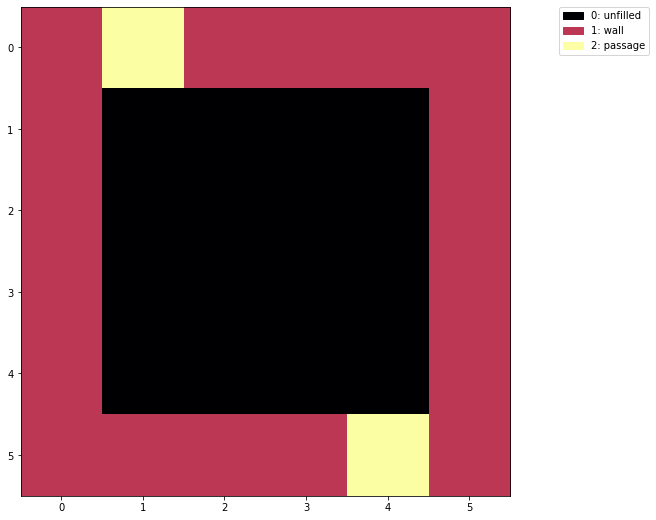

In [3]:
palette = mpl.cm.inferno.resampled(3).colors
labels = ["0: unfilled", "1: wall", "2: passage"]

def show(arr):
    plt.figure(figsize=(9, 9))
    im = plt.imshow(palette[arr])
    # create a legend on the side
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(palette, labels)]
    plt.legend(handles=patches, bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0)
    plt.show()

show(b)

In [ ]:
np.where(b == 2)

In [ ]:
start = tuple(coord[0] for coord in np.where(b == 2))
start

In [ ]:
np.where(b == 0)

In [ ]:
np.swapaxes(np.where(b == 0), 0, 1)

In [ ]:
a = box(30, 30)
show(a)

In [ ]:
def maze1(arr):
    unfilled = np.swapaxes(np.where(arr == 0), 0, 1)
    np.random.shuffle(unfilled)

    start = tuple(coord[0] for coord in np.where(b == 2))
    arr = np.copy(arr)
    arr[arr == 2] = 0

    for lc in unfilled:
        lc = tuple(lc)
        arr[lc] = 1
        t = flood_fill(arr, start, 1)
        if np.any(t == 0):
            arr[lc] = 0

    arr[arr == 0] = 2
    return arr

show(maze1(a))

In [ ]:
def maze2(arr):
    unfilled = np.swapaxes(np.where(arr == 0), 0, 1)
    np.random.shuffle(unfilled)

    start = tuple(coord[0] for coord in np.where(b == 2))
    arr = np.copy(arr)
    arr[arr == 2] = 0

    for lc in unfilled:
        lc = tuple(lc)
        arr[lc] = 1
        t = flood_fill(arr, start, 1, connectivity=1)
        if np.any(t == 0):
            arr[lc] = 0

    arr[arr == 0] = 2
    return arr

show(maze2(a))

In [21]:
# mask for cells above, below, left and right
neighbours = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]], dtype=np.uint8)

def maze3(arr):
    unfilled = np.swapaxes(np.where(arr == 0), 0, 1)
    np.random.shuffle(unfilled)

    start = tuple(coord[0] for coord in np.where(arr == 2))
    arr = np.copy(arr)
    arr[arr == 2] = 0

    for lc in unfilled:
        lc = tuple(lc)
        
        y, x = lc
        # protect dead-ends from becoming walls
        if np.sum(neighbours * arr[y-1:y+2, x-1:x+2]) > 2:
            continue
        
        arr[lc] = 1
        t = flood_fill(arr, start, 1, connectivity=1)
        if np.any(t == 0):
            arr[lc] = 0

    arr[arr == 0] = 2
    return arr

#m = maze3(a)
#show(m)

In [ ]:
# spoiler
t = flood_fill(m, (0, 0), 0)
show(t)

In [ ]:
c = box(31, 31)
c[::2, ::2] = 1  # walls on even (y, x) values
c[1::2, 1::2] = 2  # passages on odd (y, x) values
show(c)

In [ ]:
from skimage.io import imsave
imsave('grid_pattern.png', palette[c])

In [ ]:
sm = maze3(c)
show(sm)

In [ ]:
# spoiler
t = flood_fill(sm, (0,0), 0)
show(t)

In [ ]:
brain = imread('brain-coral.jpg')
plt.figure(figsize=(9, 9))
im = plt.imshow(brain)

In [ ]:
crop_brain = rgb2gray(brain[-500:,200:1000])
plt.figure(figsize=(15, 9))
im = plt.imshow(crop_brain, plt.cm.gray)
cb = plt.colorbar()

In [ ]:
small_brain = resize(crop_brain, (50, 80))
binary_brain = small_brain > threshold_local(small_brain, 15, 'mean')
plt.figure(figsize=(9, 9))
im = plt.imshow(binary_brain, plt.cm.gray)

In [ ]:
d = box(52, 82)
insert_brain = (binary_brain + 2) % 3 
d[1:-1, 1:-1] = insert_brain
show(d)

In [ ]:
imsave('brain_pattern.png', palette[d])

In [ ]:
bm = maze2(d)  # maze2 is better: don't need lots of extra dead-ends
show(bm)

In [ ]:
# spoiler
t = flood_fill(bm, (0,0), 0)
show(t)

combine grid_pattern and brain_pattern above with image editor into a new template:

use red component to convert back to 0:unfilled, 1: wall, 2: passage

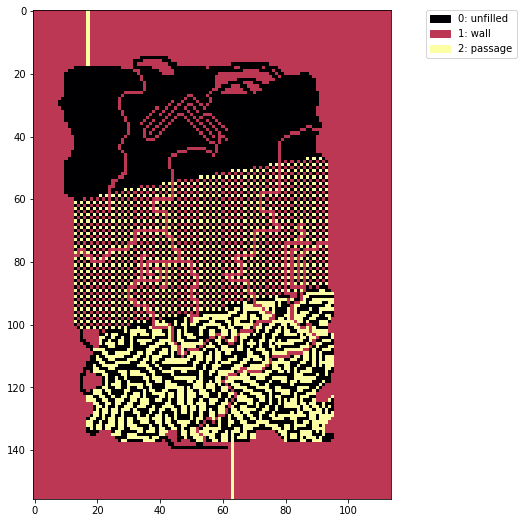

In [24]:
n = imread('combined_pattern.png')
n = np.array((n[...,0] == 188) + (n[...,0] == 252) * 2, dtype=np.uint8)
show(n)

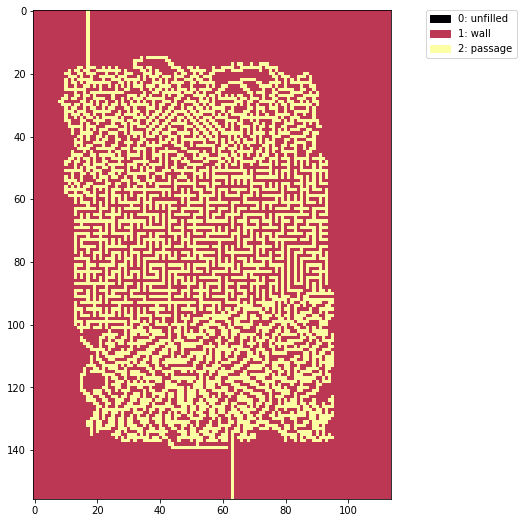

In [25]:
mn = maze3(n)
show(mn)

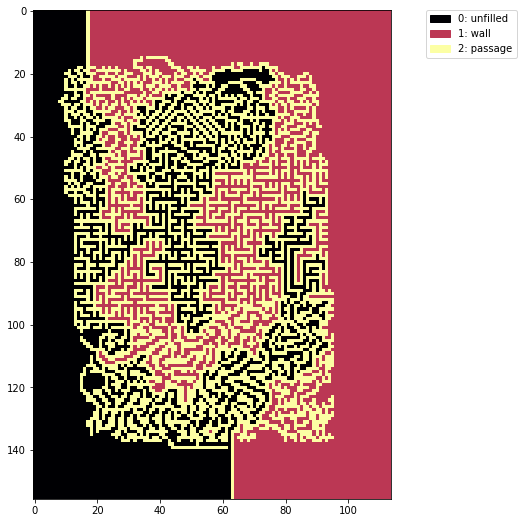

In [26]:
# spoiler
t = flood_fill(mn, (0,0), 0)
show(t)

In [ ]:
np.savetxt('maze.txt', mn, '%1d', '')